Number of classes: 20
Classes: ['small', 'stand', 'which', 'agree', 'doctor', 'college', 'pray', 'secondary', 'today', 'afraid', 'become', 'pain', 'specific', 'from', 'warn', 'skin', 'bad', 'assistance', 'you', 'work']
Found image path: /kaggle/input/isl-real-life-words-1/Indian sign Language-Real-life Words/New folder/small/small/User_6/small774_User6_774.jpg


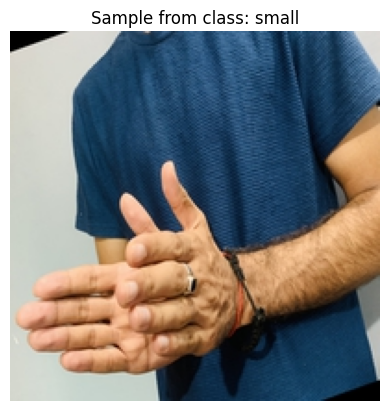

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Root folder path
DATASET_PATH = "/kaggle/input/isl-real-life-words-1/Indian sign Language-Real-life Words/New folder"

# Get all class names (20 words)
classes = [c for c in os.listdir(DATASET_PATH) if not c.startswith('.')]
print("Number of classes:", len(classes))
print("Classes:", classes)

# Automatically find an image inside subfolders
example_img_path = None
for cls in classes:
    class_path = os.path.join(DATASET_PATH, cls, cls)
    if os.path.exists(class_path):
        for user_folder in os.listdir(class_path):
            user_path = os.path.join(class_path, user_folder)
            for file in os.listdir(user_path):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    example_img_path = os.path.join(user_path, file)
                    break
            if example_img_path:
                break
    if example_img_path:
        break

print("Found image path:", example_img_path)

# Read and display
if example_img_path and os.path.exists(example_img_path):
    img = cv2.imread(example_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Sample from class: {cls}")
    plt.axis('off')
    plt.show()
else:
    print("❌ No valid image found — check folder structure again.")


In [2]:
# Script for flattening all User folders automatically
import shutil
from tqdm import tqdm

# Original path (read-only)
SRC_ROOT = "/kaggle/input/isl-real-life-words-1/Indian sign Language-Real-life Words/New folder"

# Destination path (temporary writeable copy)
DEST_ROOT = "/kaggle/working/ISL_flattened"

os.makedirs(DEST_ROOT, exist_ok=True)

# Iterate through each word class
for cls in os.listdir(SRC_ROOT):
    cls_path = os.path.join(SRC_ROOT, cls, cls)  # e.g. .../afraid/afraid
    if not os.path.isdir(cls_path):
        continue

    dest_class_path = os.path.join(DEST_ROOT, cls)
    os.makedirs(dest_class_path, exist_ok=True)

    # Traverse User folders (User_1, User_2, ...)
    for user_folder in os.listdir(cls_path):
        user_path = os.path.join(cls_path, user_folder)
        if not os.path.isdir(user_path):
            continue

        # Copy all images from each User folder into flattened class folder
        for img_file in os.listdir(user_path):
            if img_file.lower().endswith((".jpg", ".jpeg", ".png")):
                src_file = os.path.join(user_path, img_file)
                dest_file = os.path.join(dest_class_path, f"{user_folder}_{img_file}")
                shutil.copy2(src_file, dest_file)

print("✅ Flattening complete!")
print("Flattened structure stored at:", DEST_ROOT)

# Optional: quick check
print("Example contents of one class folder:")
example_class = os.listdir(DEST_ROOT)[0]
print(os.listdir(os.path.join(DEST_ROOT, example_class))[:10])


✅ Flattening complete!
Flattened structure stored at: /kaggle/working/ISL_flattened
Example contents of one class folder:
['User_3_pray405_User3_405.jpg', 'User_4_pray522_User4_522.jpg', 'User_1_pray_150_User1_150.jpg', 'User_5_pray653_User5_653.jpg', 'User_4_pray472_User4_472.jpg', 'User_5_pray705_User5_705.jpg', 'User_1_pray_48_User1_48.jpg', 'User_4_pray578_User4_578.jpg', 'User_4_pray584_User4_584.jpg', 'User_4_pray566_User4_566.jpg']


2025-11-09 14:19:00.034257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762697940.252149      39 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762697940.313967      39 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ISL SIGN LANGUAGE CLASSIFICATION - KAGGLE GPU OPTIMIZED
TensorFlow Version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Mixed Precision: Enabled (float16)

[1] Loading dataset and analyzing class distribution...

✓ Found 20 classes

Class Distribution:
--------------------------------------------------
  work                :  930 images
  afraid              :  900 images
  agree               :  900 images
  assistance          :  900 images
  bad                 :  900 images
  become              :  900 images
  college             :  900 images
  from                :  900 images
  pain                :  900 images
  pray                :  900 images
  secondary           :  900 images
  skin                :  900 images
  small               :  900 images
  specific            :  900 images
  stand               :  900 images
  today               :  900 images
  warn   

I0000 00:00:1762697954.024366      39 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1762697954.025745      39 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762697954.026178      39 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 1
I0000 00:00:1762697954.027264      39 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 17880 files belonging to 20 classes.
Using 5364 files for validation.

✓ Train: 196 batches (~12544 samples)
✓ Val:   56 batches (~3584 samples)
✓ Test:  28 batches (~1792 samples)

[3] Computing class weights to prevent single-class bias...

Class Weights (to balance training):
--------------------------------------------------
  afraid              : 0.981
  agree               : 0.970
  assistance          : 1.009
  bad                 : 0.961
  become              : 0.993
  college             : 0.984
  doctor              : 1.192
  from                : 1.023
  pain                : 0.978
  pray                : 0.986
  secondary           : 0.945
  skin                : 0.995
  small               : 1.018
  specific            : 1.033
  stand               : 0.987
  today               : 1.011
  warn                : 0.979
  which               : 1.013
  work                : 0.978
  you                 : 1.006

[4] Configuring balanced data augmentation...

[5] Building op

Model: "isl_mobilenetv2_optimized"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast (Cast)                     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 1280)           │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout3 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pre_output (Dense)              │ (None, 20)             │         2,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_2 (Cast)                   │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Activation)             │ (None, 20)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627,540 (10.02 MB)

 Trainable params: 366,484 (1.40 MB)

 Non-trainable params: 2,261,056 (8.63 MB)


[7] Compiling model with optimized settings...
✓ Model compiled with label smoothing and class weights

[8] Configuring callbacks for training stability...
✓ Callbacks: ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

PHASE 1: TRAINING WITH FROZEN BASE (Fast Convergence)
Epoch 1/15


I0000 00:00:1762697968.591772     112 service.cc:148] XLA service 0x7c3efc001ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762697968.592630     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762697968.592647     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762697968.624503     112 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762697968.709307     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.2802 - auc: 0.7626 - loss: 2.7647 - top3_acc: 0.4846
Epoch 1: val_accuracy improved from -inf to 0.80263, saving model to /kaggle/working/isl_models/best_model_20251109_141923.h5
196/196 ━━━━━━━━━━━━━━━━━━━━ 76s 251ms/step - accuracy: 0.2817 - auc: 0.7637 - loss: 2.7591 - top3_acc: 0.4864 - val_accuracy: 0.8026 - val_auc: 0.9885 - val_loss: 1.1998 - val_top3_acc: 0.9513 - learning_rate: 0.0010
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.6564 - auc: 0.9623 - loss: 1.5453 - top3_acc: 0.8622
Epoch 2: val_accuracy improved from 0.80263 to 0.86646, saving model to /kaggle/working/isl_models/best_model_20251109_141923.h5
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 172ms/step - accuracy: 0.6565 - auc: 0.9623 - loss: 1.5449 - top3_acc: 0.8623 - val_accuracy: 0.8665 - val_auc: 0.9955 - val_loss: 1.0159 - val_top3_acc: 0.9790 - learning_rate: 0.0010
Epoch 3/15
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7420 - auc

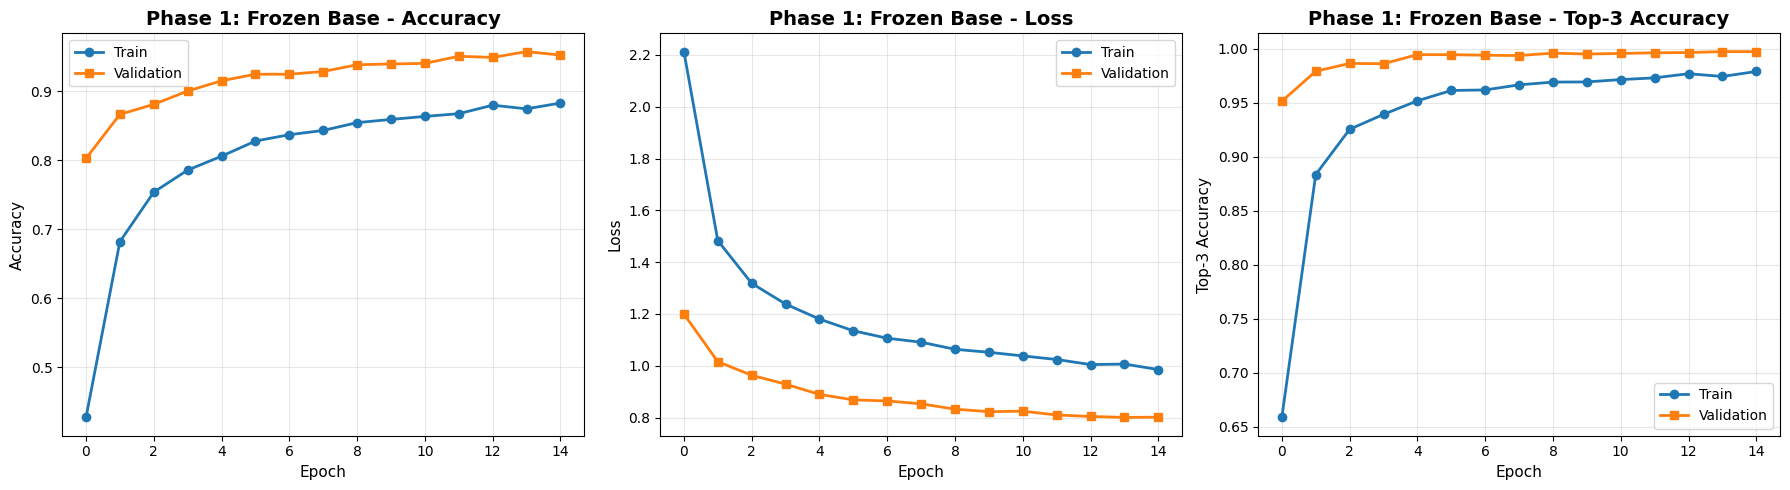

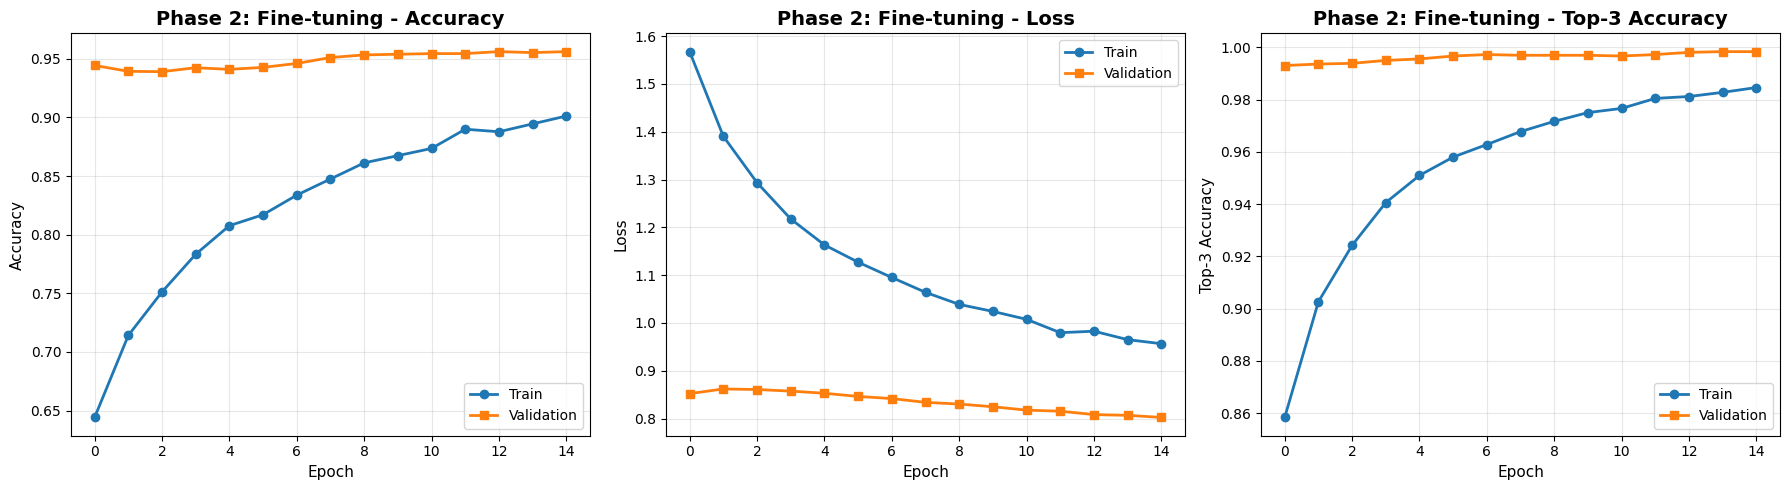


COMPREHENSIVE MODEL EVALUATION

[12] Collecting predictions on test set...

TEST ACCURACY: 96.26%

[13] Analyzing prediction distribution (single-class bias check)...

Prediction Distribution:
------------------------------------------------------------
afraid         :   80 ( 4.46%) ██
agree          :   91 ( 5.08%) ██
assistance     :   88 ( 4.91%) ██
bad            :   92 ( 5.13%) ██
become         :  105 ( 5.86%) ██
college        :   86 ( 4.80%) ██
doctor         :   88 ( 4.91%) ██
from           :   87 ( 4.85%) ██
pain           :   78 ( 4.35%) ██
pray           :   81 ( 4.52%) ██
secondary      :   78 ( 4.35%) ██
skin           :   86 ( 4.80%) ██
small          :   98 ( 5.47%) ██
specific       :   96 ( 5.36%) ██
stand          :   90 ( 5.02%) ██
today          :   92 ( 5.13%) ██
warn           :   88 ( 4.91%) ██
which          :   94 ( 5.25%) ██
work           :   96 ( 5.36%) ██
you            :   98 ( 5.47%) ██

✓ GOOD: Predictions well-distributed (max: 5.9%)

[14] Analyzing

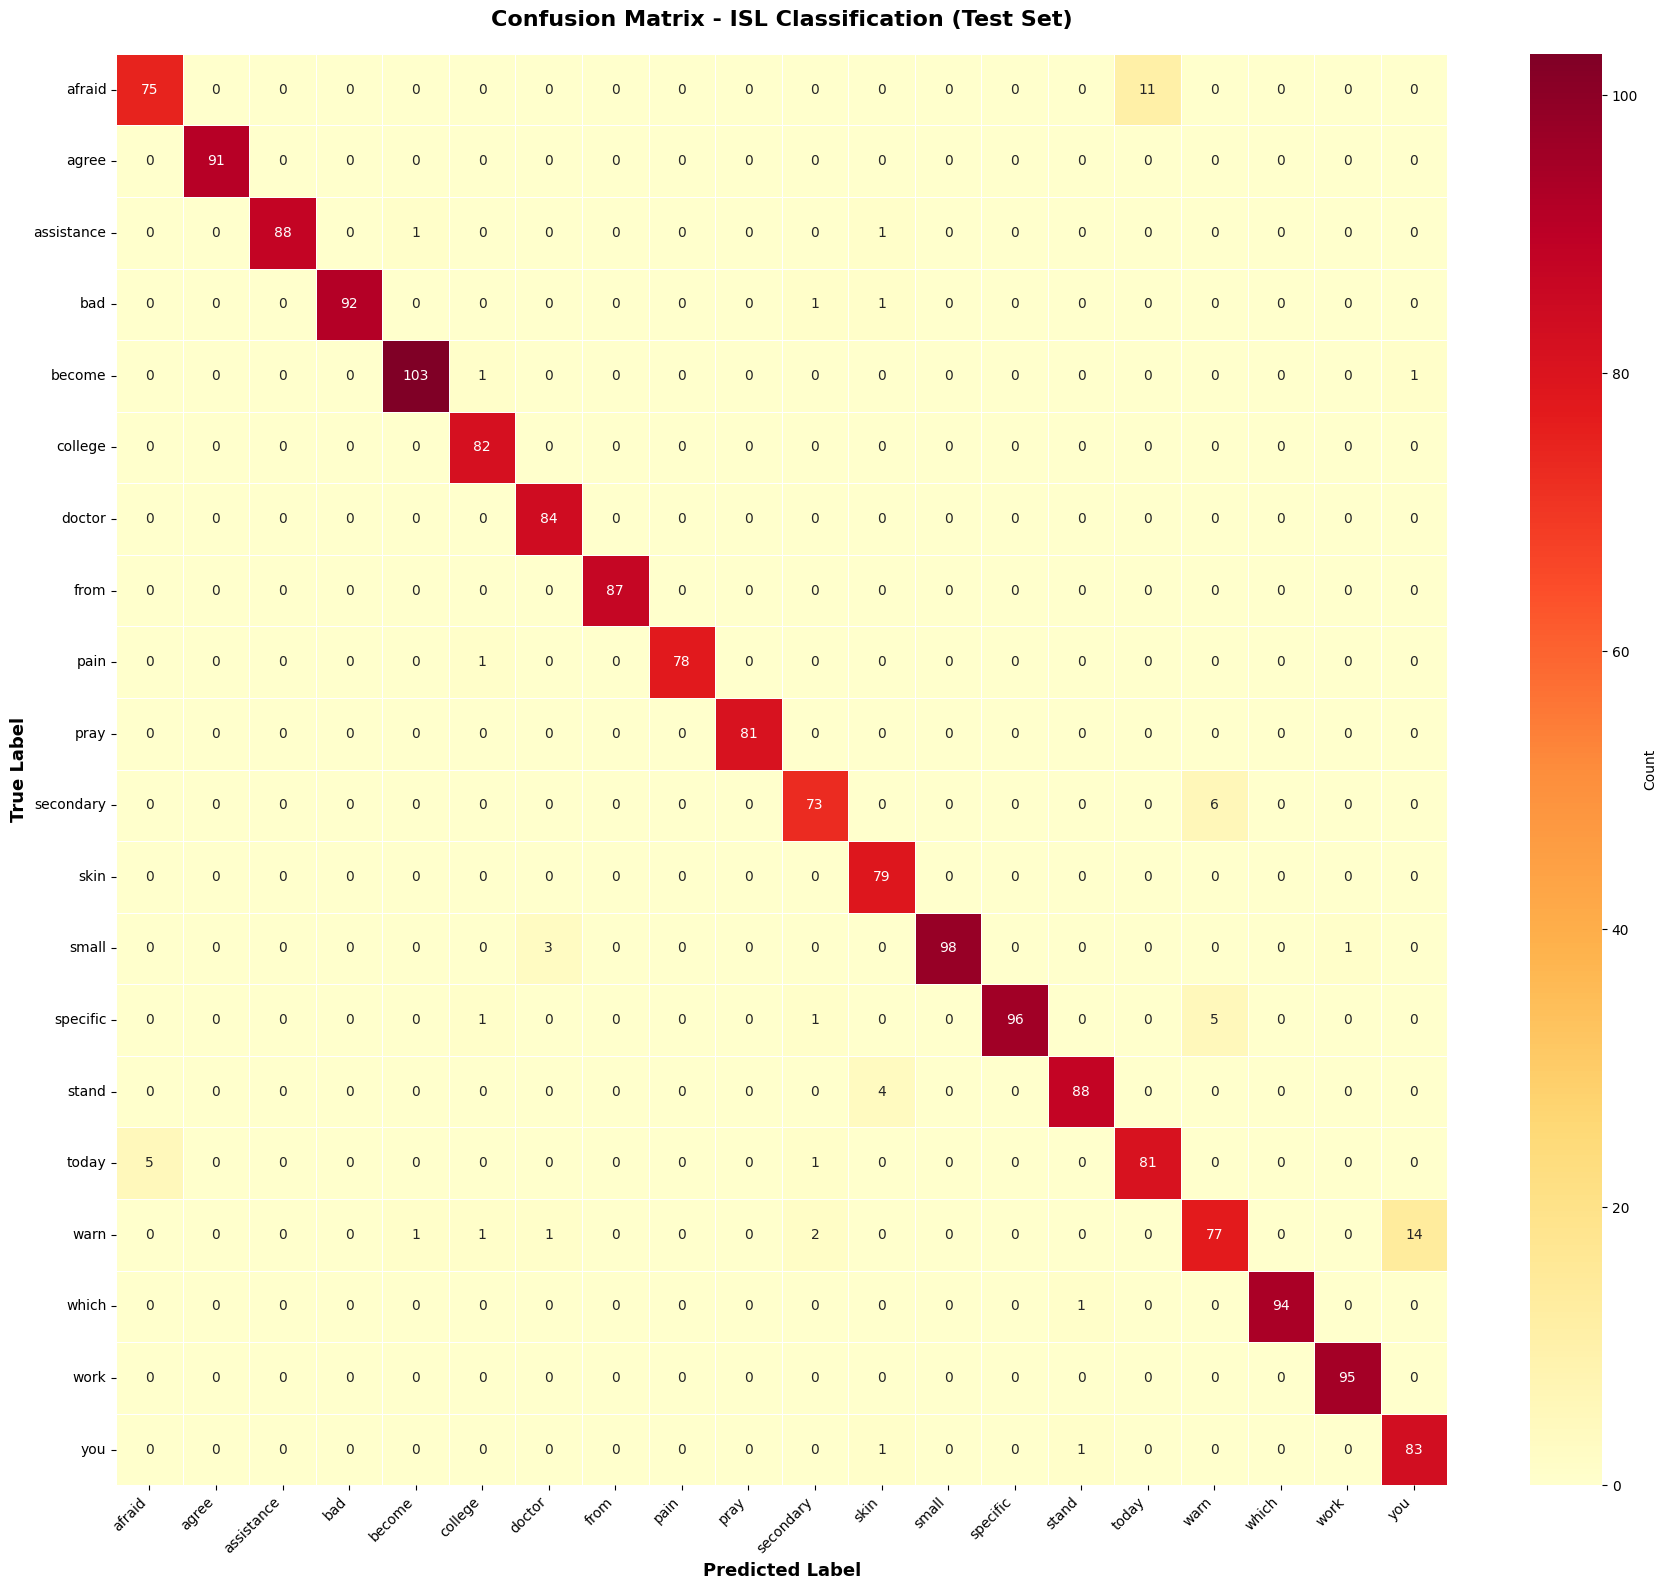


[17] Per-class performance analysis...

Per-Class Accuracy:
------------------------------------------------------------
afraid         : 87.21% (86 samples)
agree          : 100.00% (91 samples)
assistance     : 97.78% (90 samples)
bad            : 97.87% (94 samples)
become         : 98.10% (105 samples)
college        : 100.00% (82 samples)
doctor         : 100.00% (84 samples)
from           : 100.00% (87 samples)
pain           : 98.73% (79 samples)
pray           : 100.00% (81 samples)
secondary      : 92.41% (79 samples)
skin           : 100.00% (79 samples)
small          : 96.08% (102 samples)
specific       : 93.20% (103 samples)
stand          : 95.65% (92 samples)
today          : 93.10% (87 samples)
warn           : 80.21% (96 samples)
which          : 98.95% (95 samples)
work           : 100.00% (95 samples)
you            : 97.65% (85 samples)


In [3]:
# =============================================================================
# OPTIMIZED: ISL Sign Language Classification for Kaggle GPU
# Memory-Efficient | Robust | Class-Balanced | No Single-Class Bias
# =============================================================================

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, mixed_precision
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import gc

# Enable mixed precision for faster training on GPU
mixed_precision.set_global_policy('mixed_float16')

# -------------------------
# OPTIMIZED CONFIGURATION FOR KAGGLE GPU
# -------------------------
DEST_ROOT = "/kaggle/working/ISL_flattened"
IMG_SIZE = (128, 128)  # Reduced from 224x224 for memory efficiency
BATCH_SIZE = 64        # Increased batch size for GPU utilization
EPOCHS = 30
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE
MODEL_SAVE_DIR = "/kaggle/working/isl_models"
os.makedirs(MODEL_SAVE_DIR, exist_ok=True)

# Memory optimization
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
tf.config.optimizer.set_jit(True)  # Enable XLA compilation

print("=" * 80)
print("ISL SIGN LANGUAGE CLASSIFICATION - KAGGLE GPU OPTIMIZED")
print("=" * 80)
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")
print(f"Mixed Precision: Enabled (float16)")
print("=" * 80)

# -------------------------
# 1) EFFICIENT DATASET LOADING WITH CLASS BALANCE CHECK
# -------------------------
print("\n[1] Loading dataset and analyzing class distribution...")

# Count samples per class
class_counts = {}
class_dirs = sorted([d for d in os.listdir(DEST_ROOT) if os.path.isdir(os.path.join(DEST_ROOT, d))])

for cls in class_dirs:
    cls_path = os.path.join(DEST_ROOT, cls)
    count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    class_counts[cls] = count

print(f"\n✓ Found {len(class_dirs)} classes")
print("\nClass Distribution:")
print("-" * 50)
for cls, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {cls:20s}: {count:4d} images")

total_samples = sum(class_counts.values())
max_count = max(class_counts.values())
min_count = min(class_counts.values())
imbalance_ratio = max_count / min_count

print(f"\n✓ Total samples: {total_samples}")
print(f"✓ Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio > 2.0:
    print("⚠ Class imbalance detected - will use class weights")

# -------------------------
# 2) CREATE DATASETS WITH PROPER SPLITTING AND SHUFFLING
# -------------------------
print("\n[2] Creating optimized train/val/test splits...")

# Create training dataset (70%)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DEST_ROOT,
    validation_split=0.3,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

# Create validation dataset (20% of total)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DEST_ROOT,
    validation_split=0.3,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

# Split validation into val and test
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 3)
val_ds = val_ds.skip(val_batches // 3)

class_names = train_ds.class_names
num_classes = len(class_names)

train_batches = tf.data.experimental.cardinality(train_ds).numpy()
val_batches = tf.data.experimental.cardinality(val_ds).numpy()
test_batches = tf.data.experimental.cardinality(test_ds).numpy()

print(f"\n✓ Train: {train_batches} batches (~{train_batches * BATCH_SIZE} samples)")
print(f"✓ Val:   {val_batches} batches (~{val_batches * BATCH_SIZE} samples)")
print(f"✓ Test:  {test_batches} batches (~{test_batches * BATCH_SIZE} samples)")

# -------------------------
# 3) COMPUTE CLASS WEIGHTS TO PREVENT BIAS
# -------------------------
print("\n[3] Computing class weights to prevent single-class bias...")

# Extract all labels from training set
train_labels = []
for _, labels in train_ds.unbatch().batch(1000):
    train_labels.extend(np.argmax(labels.numpy(), axis=1))
train_labels = np.array(train_labels)

# Compute balanced class weights
class_weights_array = compute_class_weight(
    'balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights_array))

print("\nClass Weights (to balance training):")
print("-" * 50)
for idx, weight in class_weights.items():
    print(f"  {class_names[idx]:20s}: {weight:.3f}")

# -------------------------
# 4) BALANCED DATA AUGMENTATION
# -------------------------
print("\n[4] Configuring balanced data augmentation...")

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.12),
    layers.RandomZoom(0.12),
    layers.RandomTranslation(0.08, 0.08),
    layers.RandomBrightness(0.15),
    layers.RandomContrast(0.15),
], name="data_augmentation")

# -------------------------
# 5) OPTIMIZED DATASET PIPELINE
# -------------------------
print("\n[5] Building optimized data pipeline...")

def prepare_dataset(ds, shuffle=False, augment=False):
    """Prepare dataset with optimal performance settings"""
    if shuffle:
        ds = ds.shuffle(1000, seed=SEED, reshuffle_each_iteration=True)
    
    # Cache after shuffle for efficiency
    ds = ds.cache()
    
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                   num_parallel_calls=AUTOTUNE)
    
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_dataset(train_ds, shuffle=True, augment=True)
val_ds = prepare_dataset(val_ds, shuffle=False, augment=False)
test_ds = prepare_dataset(test_ds, shuffle=False, augment=False)

print("✓ Data pipeline optimized with prefetching and caching")

# -------------------------
# 6) BUILD MEMORY-EFFICIENT MODEL
# -------------------------
print("\n[6] Building memory-efficient MobileNetV2 model...")

def build_optimized_model(input_shape=(128, 128, 3), num_classes=num_classes):
    """
    Optimized model for Kaggle GPU with:
    - Smaller input size (128x128)
    - Efficient MobileNetV2 backbone
    - Dropout for regularization
    - BatchNorm for stability
    - Label smoothing in loss
    """
    inputs = layers.Input(shape=input_shape, name='input')
    
    # Normalization only (augmentation applied in dataset pipeline)
    x = layers.Rescaling(1./255, name='rescaling')(inputs)
    
    # Load MobileNetV2 with smaller input
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet',
        alpha=1.0  # Full width for better accuracy
    )
    
    # CRITICAL: Freeze base initially, will unfreeze partially later
    base_model.trainable = False
    
    x = base_model(x, training=False)
    
    # Efficient head with regularization
    x = layers.GlobalAveragePooling2D(name='gap')(x)
    x = layers.BatchNormalization(name='bn1')(x)
    x = layers.Dropout(0.5, name='dropout1')(x)
    
    x = layers.Dense(256, activation='relu', name='dense1')(x)
    x = layers.BatchNormalization(name='bn2')(x)
    x = layers.Dropout(0.4, name='dropout2')(x)
    
    x = layers.Dense(128, activation='relu', name='dense2')(x)
    x = layers.Dropout(0.3, name='dropout3')(x)
    
    # Output layer with float32 for numerical stability
    x = layers.Dense(num_classes, name='pre_output')(x)
    outputs = layers.Activation('softmax', dtype='float32', name='output')(x)
    
    model = models.Model(inputs, outputs, name='isl_mobilenetv2_optimized')
    return model

model = build_optimized_model()
print("\n✓ Model architecture:")
model.summary()

# -------------------------
# 7) COMPILE WITH OPTIMIZATION
# -------------------------
print("\n[7] Compiling model with optimized settings...")

# Use mixed precision optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
optimizer = mixed_precision.LossScaleOptimizer(optimizer)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(
        label_smoothing=0.1  # CRITICAL: Prevents overconfidence
    ),
    metrics=[
        'accuracy',
        tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_acc'),
        tf.keras.metrics.AUC(name='auc', multi_label=True)
    ]
)

print("✓ Model compiled with label smoothing and class weights")

# -------------------------
# 8) SETUP ROBUST CALLBACKS
# -------------------------
print("\n[8] Configuring callbacks for training stability...")

now = datetime.now().strftime("%Y%m%d_%H%M%S")
checkpoint_path = os.path.join(MODEL_SAVE_DIR, f"best_model_{now}.h5")

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1,
        save_weights_only=False
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1,
        mode='min'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1,
        mode='min'
    ),
    tf.keras.callbacks.TerminateOnNaN()
]

print("✓ Callbacks: ModelCheckpoint, EarlyStopping, ReduceLROnPlateau")

# -------------------------
# 9) PHASE 1: TRAIN WITH FROZEN BASE
# -------------------------
print("\n" + "=" * 80)
print("PHASE 1: TRAINING WITH FROZEN BASE (Fast Convergence)")
print("=" * 80)

history_phase1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks,
    class_weight=class_weights,  # CRITICAL: Use class weights
    verbose=1
)

print("\n✓ Phase 1 complete!")

# Clear memory
gc.collect()
tf.keras.backend.clear_session()

# -------------------------
# 10) PHASE 2: FINE-TUNE WITH PARTIAL UNFREEZING
# -------------------------
print("\n" + "=" * 80)
print("PHASE 2: FINE-TUNING WITH PARTIAL LAYER UNFREEZING")
print("=" * 80)

# Find base model
base_model = None
for layer in model.layers:
    if hasattr(layer, 'name') and 'mobilenetv2' in layer.name.lower():
        base_model = layer
        break

if base_model is not None:
    # CRITICAL: Unfreeze only top layers (last 40 out of 155)
    base_model.trainable = True
    
    freeze_until = len(base_model.layers) - 40
    for i, layer in enumerate(base_model.layers):
        if i < freeze_until:
            layer.trainable = False
        else:
            layer.trainable = True
    
    trainable_count = sum([1 for layer in base_model.layers if layer.trainable])
    print(f"\n✓ Unfroze last {trainable_count} layers of MobileNetV2")
    
    # Recompile with lower learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-6)
    optimizer = mixed_precision.LossScaleOptimizer(optimizer)
    
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=[
            'accuracy',
            tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_acc'),
            tf.keras.metrics.AUC(name='auc', multi_label=True)
        ]
    )
    
    print("✓ Recompiled with lower learning rate for fine-tuning")
    
    # Fine-tune
    history_phase2 = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=15,
        callbacks=callbacks,
        class_weight=class_weights,
        verbose=1
    )
    
    print("\n✓ Phase 2 complete!")

# -------------------------
# 11) VISUALIZE TRAINING PROGRESS
# -------------------------
print("\n[11] Generating training visualizations...")

def plot_training(history, title, phase_num):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Train', linewidth=2, marker='o')
    axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2, marker='s')
    axes[0].set_title(f'{title} - Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch', fontsize=11)
    axes[0].set_ylabel('Accuracy', fontsize=11)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Loss
    axes[1].plot(history.history['loss'], label='Train', linewidth=2, marker='o')
    axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2, marker='s')
    axes[1].set_title(f'{title} - Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch', fontsize=11)
    axes[1].set_ylabel('Loss', fontsize=11)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    # Top-3 Accuracy
    if 'top3_acc' in history.history:
        axes[2].plot(history.history['top3_acc'], label='Train', linewidth=2, marker='o')
        axes[2].plot(history.history['val_top3_acc'], label='Validation', linewidth=2, marker='s')
        axes[2].set_title(f'{title} - Top-3 Accuracy', fontsize=14, fontweight='bold')
        axes[2].set_xlabel('Epoch', fontsize=11)
        axes[2].set_ylabel('Top-3 Accuracy', fontsize=11)
        axes[2].legend(fontsize=10)
        axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_SAVE_DIR, f'training_phase{phase_num}_{now}.png'), 
                dpi=150, bbox_inches='tight')
    plt.show()

plot_training(history_phase1, "Phase 1: Frozen Base", 1)
if 'history_phase2' in locals():
    plot_training(history_phase2, "Phase 2: Fine-tuning", 2)

# -------------------------
# 12) COMPREHENSIVE EVALUATION ON TEST SET
# -------------------------
print("\n" + "=" * 80)
print("COMPREHENSIVE MODEL EVALUATION")
print("=" * 80)

print("\n[12] Collecting predictions on test set...")

y_true = []
y_pred = []
y_pred_probs = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_pred_probs.extend(preds)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)

# Overall metrics
test_accuracy = np.mean(y_pred == y_true)
print(f"\n{'='*80}")
print(f"TEST ACCURACY: {test_accuracy*100:.2f}%")
print(f"{'='*80}")

# -------------------------
# 13) CHECK FOR SINGLE-CLASS BIAS
# -------------------------
print("\n[13] Analyzing prediction distribution (single-class bias check)...")

unique_preds, pred_counts = np.unique(y_pred, return_counts=True)
pred_distribution = dict(zip(unique_preds, pred_counts))

print("\nPrediction Distribution:")
print("-" * 60)
for class_idx in range(num_classes):
    count = pred_distribution.get(class_idx, 0)
    percentage = (count / len(y_pred)) * 100
    bar = '█' * int(percentage / 2)
    print(f"{class_names[class_idx]:15s}: {count:4d} ({percentage:5.2f}%) {bar}")

# Check if model is biased toward single class
max_pred_percentage = (max(pred_counts) / len(y_pred)) * 100
if max_pred_percentage > 50:
    print(f"\n⚠ WARNING: Model shows bias toward one class ({max_pred_percentage:.1f}%)")
else:
    print(f"\n✓ GOOD: Predictions well-distributed (max: {max_pred_percentage:.1f}%)")

# -------------------------
# 14) CONFIDENCE ANALYSIS
# -------------------------
print("\n[14] Analyzing prediction confidence...")

max_confidences = np.max(y_pred_probs, axis=1)
correct_confidences = max_confidences[y_pred == y_true]
incorrect_confidences = max_confidences[y_pred != y_true]

print("\nConfidence Statistics:")
print("-" * 60)
print(f"Overall Mean Confidence:     {np.mean(max_confidences)*100:.2f}%")
print(f"Overall Median Confidence:   {np.median(max_confidences)*100:.2f}%")
print(f"Correct Predictions Mean:    {np.mean(correct_confidences)*100:.2f}%")
print(f"Incorrect Predictions Mean:  {np.mean(incorrect_confidences)*100:.2f}%")

if np.mean(max_confidences) > 0.98:
    print("\n⚠ WARNING: Model is overconfident (avg confidence > 98%)")
else:
    print("\n✓ GOOD: Model shows reasonable confidence levels")

# -------------------------
# 15) CLASSIFICATION REPORT
# -------------------------
print("\n[15] Generating classification report...")
print("\n" + "=" * 80)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 80)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# -------------------------
# 16) CONFUSION MATRIX
# -------------------------
print("\n[16] Generating confusion matrix...")

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(18, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, linewidths=0.5)
plt.title('Confusion Matrix - ISL Classification (Test Set)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(MODEL_SAVE_DIR, f'confusion_matrix_{now}.png'), 
            dpi=200, bbox_inches='tight')
plt.show()

# -------------------------
# 17) PER-CLASS PERFORMANCE
# -------------------------
print("\n[17] Per-class performance analysis...")

print("\nPer-Class Accuracy:")
print("-" * 60)
for i, class_name in enumerate(class_names):
    class_mask = y_true == i
    if class_mask.sum() > 0:
        class_acc = np.mean(y_pred[class_mask] == y_true[class_mask])
        print(f"{class_name:15s}: {class_acc*100:5.2f}% ({class_mask.sum()} samples)")

In [4]:
# 18) SAVE FINAL MODEL (MULTIPLE FORMATS)
# -------------------------
print("\n[18] Saving final model in multiple formats...")

# ✅ 1. Save full model in new Keras format
final_model_path = os.path.join(MODEL_SAVE_DIR, f"final_model_{now}.keras")
try:
    model.save(final_model_path)
    print(f"✓ Full model saved at: {final_model_path}")
except Exception as e:
    print(f"⚠ Warning: Could not save full model: {e}")

# ✅ 2. Save weights only (must end with .weights.h5)
weights_path = os.path.join(MODEL_SAVE_DIR, f"model_weights_{now}.weights.h5")
model.save_weights(weights_path)
print(f"✓ Model weights saved at: {weights_path}")

# ✅ 3. Export TensorFlow SavedModel (for serving, conversion, etc.)
savedmodel_path = os.path.join(MODEL_SAVE_DIR, f"saved_model_{now}")
model.export(savedmodel_path)
print(f"✓ SavedModel exported at: {savedmodel_path}")


[18] Saving final model in multiple formats...
✓ Full model saved at: /kaggle/working/isl_models/final_model_20251109_141923.keras
✓ Model weights saved at: /kaggle/working/isl_models/model_weights_20251109_141923.weights.h5
Saved artifact at '/kaggle/working/isl_models/saved_model_20251109_141923'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input')
Output Type:
  TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)
Captures:
  136611890208720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136611890210256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136611890209104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136611890209296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136611890208912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136611890211408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136611890211792: TensorSpec(shape=()

In [5]:
# -------------------------
# 19) OPTIMIZED PREDICTION FUNCTION
# -------------------------
print("\n[19] Creating prediction utility...")

def predict_image(img_path, model=model, img_size=IMG_SIZE, 
                 class_names=class_names, top_k=5):
    """
    Predict class for a single image
    NOTE: Model handles normalization internally
    """
    # Load and resize image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict (no manual normalization needed)
    probs = model.predict(img_array, verbose=0)[0]
    
    # Get top-k predictions
    top_k_indices = np.argsort(probs)[-top_k:][::-1]
    
    results = []
    for idx in top_k_indices:
        results.append({
            'class': class_names[idx],
            'confidence': float(probs[idx]),
            'percentage': f"{float(probs[idx])*100:.2f}%"
        })
    
    return results

# -------------------------
# 20) TEST PREDICTIONS ON SAMPLE IMAGES
# -------------------------
print("\n[20] Testing predictions on sample images from each class...")
print("=" * 80)

sample_predictions = []
for cls in class_names[:10]:  # Test first 10 classes
    cls_path = os.path.join(DEST_ROOT, cls)
    if os.path.exists(cls_path):
        images = [f for f in os.listdir(cls_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if images:
            sample_path = os.path.join(cls_path, images[0])
            predictions = predict_image(sample_path, top_k=3)
            
            print(f"\nTrue Class: {cls}")
            print(f"Top-3 Predictions:")
            for i, pred in enumerate(predictions, 1):
                symbol = "✓" if pred['class'] == cls else "✗"
                print(f"  {i}. {symbol} {pred['class']:15s} - {pred['percentage']}")
            
            sample_predictions.append({
                'true': cls,
                'predicted': predictions[0]['class'],
                'correct': predictions[0]['class'] == cls
            })

# Summary of sample predictions
correct_samples = sum([1 for p in sample_predictions if p['correct']])
print(f"\n{'='*80}")
print(f"Sample Prediction Accuracy: {correct_samples}/{len(sample_predictions)} "
      f"({correct_samples/len(sample_predictions)*100:.1f}%)")
print(f"{'='*80}")

# -------------------------
# 21) FINAL SUMMARY
# -------------------------
print("\n" + "=" * 80)
print("TRAINING COMPLETE - FINAL SUMMARY")
print("=" * 80)
print(f"✓ Test Accuracy: {test_accuracy*100:.2f}%")
print(f"✓ Classes: {num_classes}")
print(f"✓ Total Training Samples: ~{train_batches * BATCH_SIZE}")
print(f"✓ Image Size: {IMG_SIZE}")
print(f"✓ Batch Size: {BATCH_SIZE}")
print(f"✓ Mixed Precision: Enabled")
print(f"✓ Class Weights: Applied")
print(f"✓ Label Smoothing: 0.1")
print(f"✓ Max Single-Class Prediction: {max_pred_percentage:.1f}%")
print(f"\nModels saved in: {MODEL_SAVE_DIR}")
print("=" * 80)

# Memory cleanup
gc.collect()
tf.keras.backend.clear_session()

print("\n✅ All done! Model is ready for deployment.")


[19] Creating prediction utility...

[20] Testing predictions on sample images from each class...

True Class: afraid
Top-3 Predictions:
  1. ✓ afraid          - 49.43%
  2. ✗ today           - 43.62%
  3. ✗ become          - 2.39%

True Class: agree
Top-3 Predictions:
  1. ✓ agree           - 97.86%
  2. ✗ small           - 0.67%
  3. ✗ work            - 0.20%

True Class: assistance
Top-3 Predictions:
  1. ✓ assistance      - 87.64%
  2. ✗ secondary       - 2.12%
  3. ✗ doctor          - 1.97%

True Class: bad
Top-3 Predictions:
  1. ✓ bad             - 93.25%
  2. ✗ afraid          - 2.04%
  3. ✗ which           - 0.89%

True Class: become
Top-3 Predictions:
  1. ✓ become          - 97.64%
  2. ✗ afraid          - 0.39%
  3. ✗ college         - 0.34%

True Class: college
Top-3 Predictions:
  1. ✓ college         - 65.72%
  2. ✗ which           - 10.28%
  3. ✗ skin            - 5.66%

True Class: doctor
Top-3 Predictions:
  1. ✓ doctor          - 98.85%
  2. ✗ you             - 0.27

ISL SIGN LANGUAGE - SINGLE IMAGE PREDICTION

✓ Found 20 classes: ['afraid', 'agree', 'assistance', 'bad', 'become', 'college', 'doctor', 'from', 'pain', 'pray', 'secondary', 'skin', 'small', 'specific', 'stand', 'today', 'warn', 'which', 'work', 'you']

Available model loading options:
--------------------------------------------------------------------------------
Option 1: Load float32 model (RECOMMENDED - no issues)
   MODEL_PATH = '/kaggle/working/isl_models/final_model_float32_XXXXXX.h5'

Option 2: Load SavedModel format
   MODEL_PATH = '/kaggle/working/isl_models/saved_model_XXXXXX'

Option 3: Rebuild architecture + load weights
   MODEL_PATH = '/kaggle/working/isl_models/model_weights_XXXXXX.h5'
   USE_WEIGHTS_ONLY = True
--------------------------------------------------------------------------------

Loading model from: /kaggle/working/isl_models/final_model_20251109_141923.keras
✓ Model loaded successfully!
✓ Model ready for predictions!

READY TO PREDICT!

Usage Examples:
--

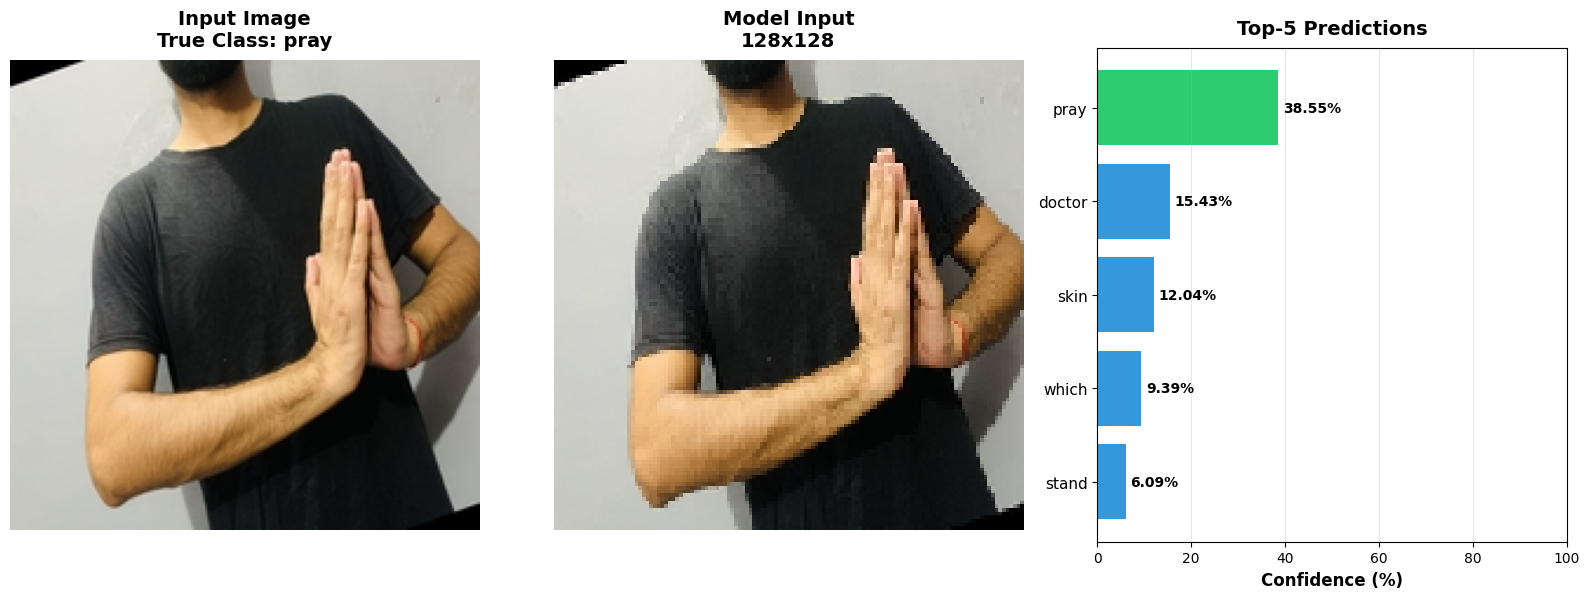


--------------------------------------------------------------------------------
PREDICTION RESULTS
--------------------------------------------------------------------------------

🎯 PREDICTED CLASS: pray
   Confidence: 38.55%

✅ CORRECT! Model predicted the right class.

Top-5 Predictions:
--------------------------------------------------------------------------------
1. ✓ pray                 :  38.55%
2.   doctor               :  15.43%
3.   skin                 :  12.04%
4.   which                :   9.39%
5.   stand                :   6.09%
--------------------------------------------------------------------------------
{'predicted_class': 'pray', 'confidence': 38.554421067237854, 'true_class': 'pray', 'correct': True, 'top_k_predictions': [{'class': 'pray', 'confidence': 38.554421067237854}, {'class': 'doctor', 'confidence': 15.426014363765717}, {'class': 'skin', 'confidence': 12.037277966737747}, {'class': 'which', 'confidence': 9.392968565225601}, {'class': 'stand', 'confide

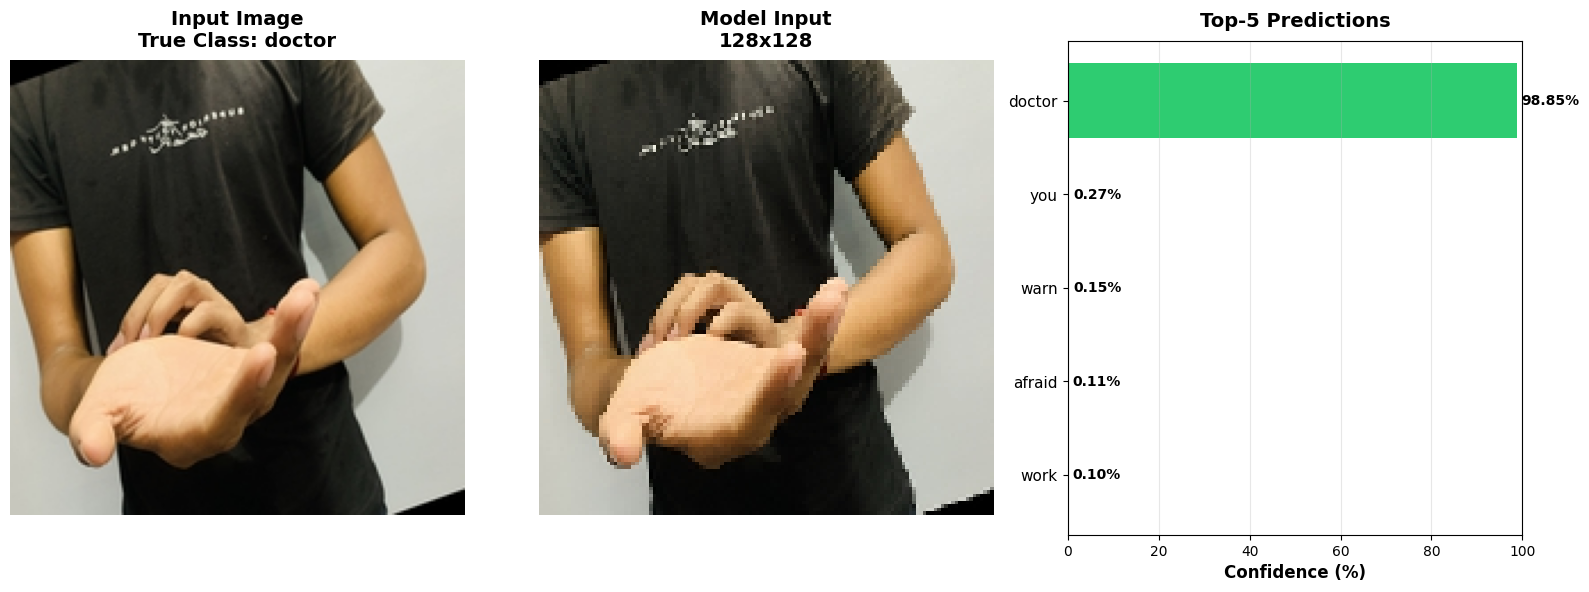


--------------------------------------------------------------------------------
PREDICTION RESULTS
--------------------------------------------------------------------------------

🎯 PREDICTED CLASS: doctor
   Confidence: 98.85%

✅ CORRECT! Model predicted the right class.

Top-5 Predictions:
--------------------------------------------------------------------------------
1. ✓ doctor               :  98.85%
2.   you                  :   0.27%
3.   warn                 :   0.15%
4.   afraid               :   0.11%
5.   work                 :   0.10%
--------------------------------------------------------------------------------

✅ Ready! Test with your own images using the examples above.


In [7]:
# =============================================================================
# ISL SINGLE IMAGE PREDICTION - SIMPLE & ROBUST VERSION
# Works with any model format
# =============================================================================

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2

print("="*80)
print("ISL SIGN LANGUAGE - SINGLE IMAGE PREDICTION")
print("="*80)

# -------------------------
# CONFIGURATION
# -------------------------
IMG_SIZE = (128, 128)
DEST_ROOT = "/kaggle/working/ISL_flattened"

# Get class names
class_names = sorted([d for d in os.listdir(DEST_ROOT) 
                     if os.path.isdir(os.path.join(DEST_ROOT, d))])
num_classes = len(class_names)
print(f"\n✓ Found {num_classes} classes: {class_names}\n")

# -------------------------
# MODEL LOADING OPTIONS
# -------------------------
print("Available model loading options:")
print("-" * 80)
print("Option 1: Load float32 model (RECOMMENDED - no issues)")
print("   MODEL_PATH = '/kaggle/working/isl_models/final_model_float32_XXXXXX.h5'")
print("\nOption 2: Load SavedModel format")
print("   MODEL_PATH = '/kaggle/working/isl_models/saved_model_XXXXXX'")
print("\nOption 3: Rebuild architecture + load weights")
print("   MODEL_PATH = '/kaggle/working/isl_models/model_weights_XXXXXX.h5'")
print("   USE_WEIGHTS_ONLY = True")
print("-" * 80)

# -------------------------
# SET YOUR MODEL PATH HERE
# -------------------------
MODEL_PATH = "/kaggle/working/isl_models/final_model_20251109_141923.keras"
USE_WEIGHTS_ONLY = False  # Set True if loading weights only

# -------------------------
# LOAD MODEL
# -------------------------
print(f"\nLoading model from: {MODEL_PATH}")

if USE_WEIGHTS_ONLY:
    # Rebuild architecture and load weights
    print("Rebuilding model architecture...")
    from tensorflow.keras import layers, models
    
    inputs = layers.Input(shape=(128, 128, 3))
    x = layers.Rescaling(1./255)(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(128, 128, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False
    
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    model.load_weights(MODEL_PATH)
    print("✓ Weights loaded successfully!")
    
else:
    # Try direct loading with various methods
    try:
        # Method 1: Load without compilation
        model = tf.keras.models.load_model(MODEL_PATH, compile=False)
        print("✓ Model loaded successfully!")
        
    except Exception as e1:
        print(f"⚠ Direct loading failed: {str(e1)[:100]}")
        print("\nTrying SavedModel format...")
        
        try:
            # Method 2: Try as SavedModel
            model = tf.keras.models.load_model(MODEL_PATH)
            print("✓ Model loaded as SavedModel!")
            
        except Exception as e2:
            print(f"⚠ SavedModel loading failed: {str(e2)[:100]}")
            print("\n❌ Could not load model. Please use one of these options:")
            print("   1. Use the float32 model (recommended)")
            print("   2. Use SavedModel format")
            print("   3. Set USE_WEIGHTS_ONLY=True and use weights file")
            raise

print("✓ Model ready for predictions!")

# -------------------------
# PREDICTION FUNCTION WITH VISUALIZATION
# -------------------------
def predict_and_visualize(img_path, top_k=5):
    """
    Predict class for an image and visualize results
    
    Args:
        img_path: Path to the image file
        top_k: Number of top predictions to show
    """
    
    # Check if file exists
    if not os.path.exists(img_path):
        print(f"❌ Error: Image not found at {img_path}")
        return None
    
    print(f"\n{'='*80}")
    print(f"Analyzing: {os.path.basename(img_path)}")
    print(f"{'='*80}")
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    
    # Make prediction (model handles normalization internally)
    predictions = model.predict(img_array_expanded, verbose=0)[0]
    
    # Get top-k predictions
    top_k_indices = np.argsort(predictions)[-top_k:][::-1]
    
    # Extract true class from path if available
    true_class = None
    for cls in class_names:
        if cls in img_path:
            true_class = cls
            break
    
    # Create visualization
    fig = plt.figure(figsize=(16, 6))
    
    # Plot 1: Original Image
    ax1 = plt.subplot(1, 3, 1)
    img_display = cv2.imread(img_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
    ax1.imshow(img_display)
    ax1.axis('off')
    if true_class:
        ax1.set_title(f'Input Image\nTrue Class: {true_class}', 
                     fontsize=14, fontweight='bold', pad=10)
    else:
        ax1.set_title('Input Image', fontsize=14, fontweight='bold', pad=10)
    
    # Plot 2: Resized Image (what model sees)
    ax2 = plt.subplot(1, 3, 2)
    ax2.imshow(img_array.astype('uint8'))
    ax2.axis('off')
    ax2.set_title(f'Model Input\n{IMG_SIZE[0]}x{IMG_SIZE[1]}', 
                 fontsize=14, fontweight='bold', pad=10)
    
    # Plot 3: Top-K Predictions Bar Chart
    ax3 = plt.subplot(1, 3, 3)
    top_k_classes = [class_names[i] for i in top_k_indices]
    top_k_probs = [predictions[i] * 100 for i in top_k_indices]
    
    # Color bars: green for correct, blue for others
    colors = []
    for cls in top_k_classes:
        if true_class and cls == true_class:
            colors.append('#2ecc71')  # Green for correct
        else:
            colors.append('#3498db')  # Blue for others
    
    bars = ax3.barh(range(top_k), top_k_probs, color=colors)
    ax3.set_yticks(range(top_k))
    ax3.set_yticklabels(top_k_classes, fontsize=11)
    ax3.set_xlabel('Confidence (%)', fontsize=12, fontweight='bold')
    ax3.set_title(f'Top-{top_k} Predictions', fontsize=14, fontweight='bold', pad=10)
    ax3.set_xlim(0, 100)
    ax3.invert_yaxis()
    
    # Add percentage labels on bars
    for i, (bar, prob) in enumerate(zip(bars, top_k_probs)):
        ax3.text(prob + 1, i, f'{prob:.2f}%', 
                va='center', fontsize=10, fontweight='bold')
    
    ax3.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print("\n" + "-"*80)
    print("PREDICTION RESULTS")
    print("-"*80)
    
    predicted_class = class_names[top_k_indices[0]]
    predicted_confidence = predictions[top_k_indices[0]] * 100
    
    print(f"\n🎯 PREDICTED CLASS: {predicted_class}")
    print(f"   Confidence: {predicted_confidence:.2f}%")
    
    if true_class:
        if predicted_class == true_class:
            print(f"\n✅ CORRECT! Model predicted the right class.")
        else:
            print(f"\n❌ INCORRECT! True class was: {true_class}")
            # Find where true class ranks
            true_class_idx = class_names.index(true_class)
            true_class_conf = predictions[true_class_idx] * 100
            true_class_rank = len(predictions) - np.where(np.argsort(predictions) == true_class_idx)[0][0]
            print(f"   True class '{true_class}' ranked #{true_class_rank} with {true_class_conf:.2f}% confidence")
    
    print(f"\nTop-{top_k} Predictions:")
    print("-"*80)
    for i, idx in enumerate(top_k_indices, 1):
        cls = class_names[idx]
        conf = predictions[idx] * 100
        marker = "✓" if (true_class and cls == true_class) else " "
        print(f"{i}. {marker} {cls:20s} : {conf:6.2f}%")
    
    print("-"*80)
    
    # Return results as dictionary
    results = {
        'predicted_class': predicted_class,
        'confidence': predicted_confidence,
        'true_class': true_class,
        'correct': (predicted_class == true_class) if true_class else None,
        'top_k_predictions': [
            {'class': class_names[idx], 'confidence': predictions[idx] * 100}
            for idx in top_k_indices
        ]
    }
    
    return results

# -------------------------
# SIMPLE PREDICTION FUNCTION (NO VISUALIZATION)
# -------------------------
def predict_image(img_path, top_k=3):
    """Quick prediction without visualization"""
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array, verbose=0)[0]
    top_k_indices = np.argsort(predictions)[-top_k:][::-1]
    
    results = []
    for idx in top_k_indices:
        results.append({
            'class': class_names[idx],
            'confidence': predictions[idx] * 100
        })
    
    return results

# -------------------------
# USAGE EXAMPLES
# -------------------------
print("\n" + "="*80)
print("READY TO PREDICT!")
print("="*80)
print("\nUsage Examples:")
print("-"*80)
print("\n1. Predict with full visualization:")
result = predict_and_visualize("/kaggle/working/ISL_flattened/pray/User_1_pray_107_User1_107.jpg", top_k=5)
print(result)

print("\n2. Quick prediction (no visualization):")
result = predict_image("/kaggle/working/ISL_flattened/afraid/User_1_afraid_100_User1_100.jpg", top_k=3)
print(result)
print("-"*80)

# -------------------------
# AUTO TEST: Random sample from dataset
# -------------------------
print("\n📸 Testing with a random sample...\n")

test_class = class_names[6]
test_class_path = os.path.join(DEST_ROOT, test_class)
if os.path.exists(test_class_path):
    images = [f for f in os.listdir(test_class_path) 
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if images:
        sample_image = os.path.join(test_class_path, images[0])
        result = predict_and_visualize(sample_image, top_k=5)

print("\n" + "="*80)
print("✅ Ready! Test with your own images using the examples above.")
print("="*80)